In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, log_loss, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
file_path = '/content/drive/MyDrive/processed_train_data_telugu1.csv'
data = pd.read_csv(file_path)

In [17]:
data.head()

,Text,Label
0,చీ నీయమ్మ జీవితం ఎవడో వేడిబుర్రపైన డొమెక్స్ ఇచ...,C
1,లైక్ కొట్టమని అడిగానా నచ్చితే లైక్ కొట్టండి లే...,C
2,చాలా ఇంపార్టెంట్ పాయింట్ ఏంటి అంటే మీరు లోపల ఎ...,G
3,గుద్ద ముయ్యి నువ్వు లంజ అంత చేసిదెంగి మళ్ళా మా...,C
4,భగవంతుడు పైన కాదు ఎక్కడో ఇక్కడ ఉన్నాడు అక్కడ ఉ...,N


In [18]:
X = data['Text']
y = data['Label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [21]:
pac_params = {'C': [0.1, 1, 10], 'max_iter': [50, 100, 200]}
pac_model = GridSearchCV(PassiveAggressiveClassifier(), pac_params, cv=5, scoring='accuracy')
pac_model.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [50, 100, 200]},
             scoring='accuracy')

In [22]:
ridge_params = {'alpha': [0.1, 1, 10], 'max_iter': [50, 100, 200]}
ridge_model = GridSearchCV(RidgeClassifier(), ridge_params, cv=5, scoring='accuracy')
ridge_model.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 1, 10], 'max_iter': [50, 100, 200]},
             scoring='accuracy')

In [23]:
et_params = {'n_estimators': [300, 400], 'max_depth': [20, 30, None], 'min_samples_split': [3, 6]}
et_model = GridSearchCV(ExtraTreesClassifier(), et_params, cv=5, scoring='accuracy')
et_model.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [20, 30, None],
                         'min_samples_split': [3, 6],
                         'n_estimators': [300, 400]},
             scoring='accuracy')

In [24]:
models = {
    "Passive-Aggressive Classifier": pac_model.best_estimator_,
    "Ridge Classifier": ridge_model.best_estimator_,
    "Extra Trees Classifier": et_model.best_estimator_,
}

results = []


Classification Report for Passive-Aggressive Classifier:

              precision    recall  f1-score   support

           C       0.89      0.78      0.83        40
           G       0.80      0.95      0.87        39
           N       0.87      0.85      0.86        40
           P       0.97      0.97      0.97        40
           R       0.89      0.87      0.88        39

    accuracy                           0.88       198
   macro avg       0.89      0.88      0.88       198
weighted avg       0.89      0.88      0.88       198



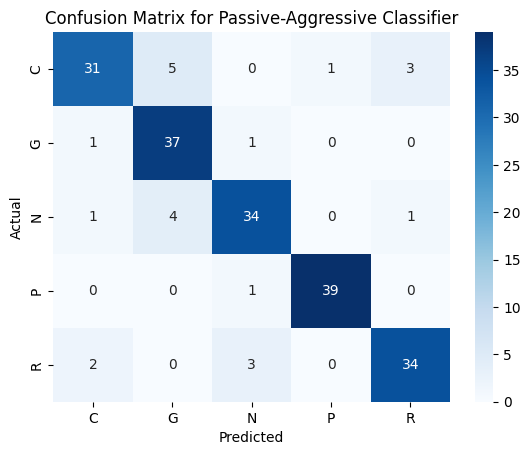


Classification Report for Ridge Classifier:

              precision    recall  f1-score   support

           C       0.89      0.78      0.83        40
           G       0.80      0.95      0.87        39
           N       0.89      0.85      0.87        40
           P       0.97      0.97      0.97        40
           R       0.90      0.90      0.90        39

    accuracy                           0.89       198
   macro avg       0.89      0.89      0.89       198
weighted avg       0.89      0.89      0.89       198



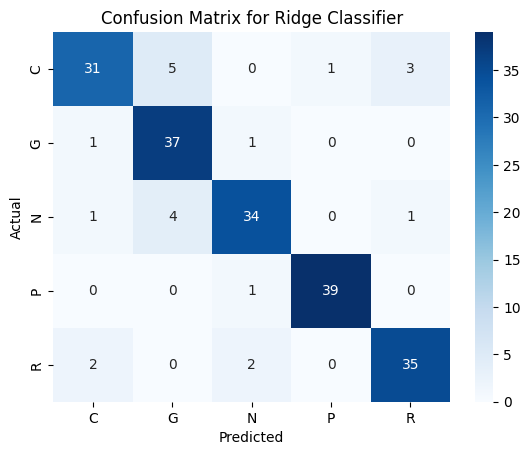


Classification Report for Extra Trees Classifier:

              precision    recall  f1-score   support

           C       0.73      0.82      0.78        40
           G       0.80      0.92      0.86        39
           N       0.88      0.70      0.78        40
           P       0.97      0.97      0.97        40
           R       0.97      0.90      0.93        39

    accuracy                           0.86       198
   macro avg       0.87      0.86      0.86       198
weighted avg       0.87      0.86      0.86       198



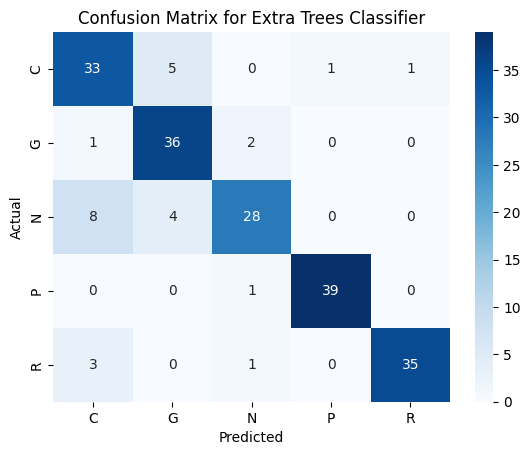

In [25]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_vectorized)
    y_pred_proba = model.predict_proba(X_test_vectorized) if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else np.nan
    macro_f1 = f1_score(y_test, y_pred, average='macro')

    # Store results
    results.append([model_name, accuracy, loss, macro_f1])

    # Print Classification Report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [26]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Log Loss', 'Macro F1 Score'])
print("\nModel Performance Comparison:\n")
results_df


Model Performance Comparison:



,Model,Accuracy,Log Loss,Macro F1 Score
0,Passive-Aggressive Classifier,0.883838,NaN,0.883226
1,Ridge Classifier,0.888889,NaN,0.888297
2,Extra Trees Classifier,0.863636,0.307568,0.863945


In [27]:
test_file_path = '/content/drive/MyDrive/processed_test_data_telug.csv'
test_data = pd.read_csv(test_file_path)
X_test_text = test_data['Transcript']

# Transform test data
X_test_vectorized = vectorizer.transform(X_test_text)

# Predict with all models
test_results = {}
for model_name, model in models.items():
    test_pred = model.predict(X_test_vectorized)
    test_results[model_name] = test_pred

# Save the predictions into a CSV file
test_data['PAC_Prediction'] = test_results['Passive-Aggressive Classifier']
test_data['Ridge_Prediction'] = test_results['Ridge Classifier']
test_data['ET_Prediction'] = test_results['Extra Trees Classifier']

output_csv_path = '/content/drive/MyDrive/novel_tfidf_predictions.csv'
test_data.to_csv(output_csv_path, index=False)
